# Data Mining Project 2

https://datacatalog.cookcountyil.gov/Property-Taxation/Assessor-Archived-05-11-2022-Residential-Sales-Dat/5pge-nu6u/about_data

1. Data Acquisition

In [1]:
import requests
import pandas as pd
import numpy as np

In [2]:
pd.set_option('display.max_columns', 100)
pd.set_option('display.max_rows', 100)


In [49]:
# or mini2/cook_county_train_val.csv
df = pd.read_csv("cook_county_train_val.csv")

In [4]:
print(len(df))

204792


In [5]:
print(df.head())

   Unnamed: 0             PIN  Property Class  Neighborhood Code  \
0           0  17294100610000             203                 50   
1           1  13272240180000             202                120   
2           2  25221150230000             202                210   
3           3  10251130030000             203                220   
4           4  31361040550000             202                120   

   Land Square Feet  Town Code  Apartments  Wall Material  Roof Material  \
0            2500.0         76         0.0            2.0            1.0   
1            3780.0         71         0.0            2.0            1.0   
2            4375.0         70         0.0            2.0            1.0   
3            4375.0         17         0.0            3.0            1.0   
4            8400.0         32         0.0            3.0            1.0   

   Basement  Basement Finish  Central Heating  Other Heating  Central Air  \
0       1.0              3.0              1.0            

2. Data Cleaning

In [6]:
# no missing values
count = df.count()
print(count)

Unnamed: 0                    204792
PIN                           204792
Property Class                204792
Neighborhood Code             204792
Land Square Feet              204792
Town Code                     204792
Apartments                    204792
Wall Material                 204792
Roof Material                 204792
Basement                      204792
Basement Finish               204792
Central Heating               204792
Other Heating                 204792
Central Air                   204792
Fireplaces                    204792
Attic Type                    204792
Attic Finish                  204792
Design Plan                   204792
Cathedral Ceiling             204792
Construction Quality          204792
Site Desirability             204792
Garage 1 Size                 204792
Garage 1 Material             204792
Garage 1 Attachment           204792
Garage 1 Area                 204792
Garage 2 Size                 204792
Garage 2 Material             204792
G

In [7]:
# clean out sale prices equal to 1 or 0
print(len(df[df['Sale Price'] < 2]))
df = df[df['Sale Price'] > 1]

35546


In [52]:
# drop non numeric columns
# could drop Property Class, Town Code, Neighborhood code, Census Tract, Town and Neighborhood
df = df.drop(columns=['PIN', 'Deed No.'])

In [53]:
# regex out description details or remove them
#print(df['Description'][0])

df = df.drop(columns=['Description'])

KeyError: "['Description'] not found in axis"

3. Data Visualization

In [18]:
import matplotlib.pyplot as plt

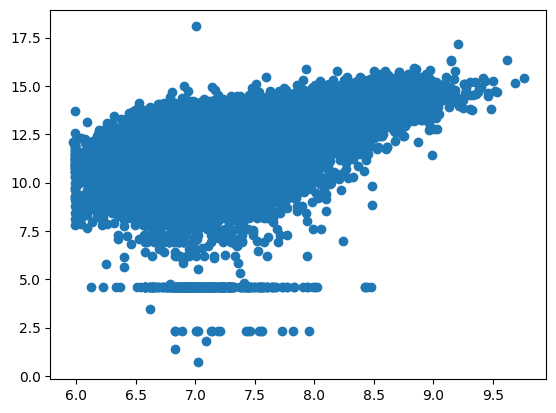

In [23]:
# scatter plot of building square feet vs sale price
plt.scatter(np.log(df['Building Square Feet']), np.log(df['Sale Price']))


4. Hypothesis Development

5. Model Development

In [42]:
# 5-fold Cross Validation

def cross_validate(model, X, y, n_folds=5):
    from sklearn.model_selection import cross_val_score
    scores = cross_val_score(model, X, y, cv=n_folds, scoring='neg_mean_squared_error')
    return int(np.sqrt((-np.mean(scores))))

In [44]:
# Simple Regression
from sklearn.linear_model import LinearRegression

def simple_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

model = simple_regression(df[['Estimate (Land)']], df['Sale Price'])

print("Simple Regression Error: ")
print(cross_validate(model, df[['Estimate (Land)']], df['Sale Price']))

Simple Regression Error: 
302750


In [45]:
# Multiple Regression with all features

def multiple_regression(X, y):
    model = LinearRegression()
    model.fit(X, y)
    return model

model = multiple_regression(df.drop(columns=['Sale Price']), df['Sale Price'])

print("Multiple Regression Error: ")
print(cross_validate(model, df.drop(columns=['Sale Price']), df['Sale Price']))


ValueError: could not convert string to float: 'SF'

In [9]:
# Subset Selection

In [10]:
# Regularization

In [12]:
# Nonlinear Models

In [13]:
# Model Comparison